## Import the Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the CSV file

In [12]:
df = pd.read_csv(r"C:\Users\jagad\Downloads\diabetes_prediction_dataset.csv.zip")
df


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [14]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
df.shape

(100000, 9)

In [18]:
df.isnull()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [22]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [24]:
df.duplicated().sum()

3854

In [26]:
df.drop_duplicates(inplace=True)

In [28]:
df.shape

(96146, 9)

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


## unique values in given columns

In [35]:
columns = ["gender","hypertension","heart_disease","smoking_history","diabetes"]
for col in columns:
    print(col, df[col].unique())

gender ['Female' 'Male' 'Other']
hypertension [0 1]
heart_disease [1 0]
smoking_history ['never' 'No Info' 'current' 'former' 'ever' 'not current']
diabetes [0 1]


In [37]:
df['gender']=="other"

0        False
1        False
2        False
3        False
4        False
         ...  
99994    False
99996    False
99997    False
99998    False
99999    False
Name: gender, Length: 96146, dtype: bool

In [39]:
df[df['gender']=="Other"].shape

(18, 9)

In [41]:
df[df['smoking_history']=="No Info"].shape

(32887, 9)

In [43]:
df[df['smoking_history']=="not current"].shape

(6367, 9)

In [45]:
df[df['smoking_history']=="former"].shape

(9299, 9)

## Summary of DataFrame

In [48]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


## Smoking history Distribution 

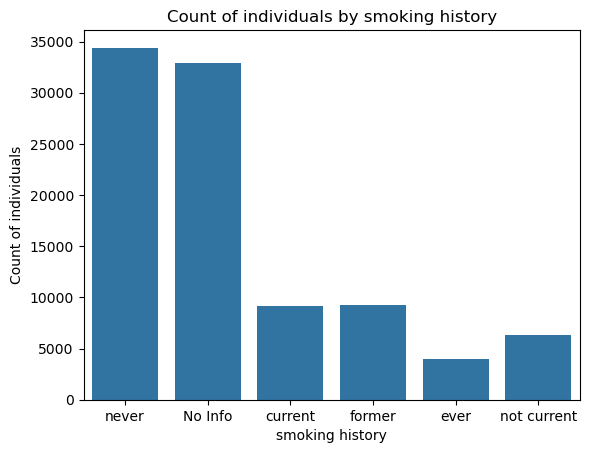

In [51]:
sns.countplot(x='smoking_history',data=df)
plt.title('Count of individuals by smoking history')
plt.xlabel('smoking history')
plt.ylabel('Count of individuals')
plt.show()

## Filter data based on Smoking history and Diabetes status

In [53]:
never1 = df[(df['smoking_history']=='never')&(df['diabetes']==1)]
never0 = df[(df['smoking_history']=='never')&(df['diabetes']==0)]
noinfo1 = df[(df['smoking_history']=='No Info')&(df['diabetes']==1)]
noinfo0 = df[(df['smoking_history']=='No Info')&(df['diabetes']==0)]
current1 = df[(df['smoking_history']=='current')&(df['diabetes']==1)]
current0 = df[(df['smoking_history']=='current')&(df['diabetes']==0)]
former1 = df[(df['smoking_history']=='former')&(df['diabetes']==1)]
former0 = df[(df['smoking_history']=='former')&(df['diabetes']==0)]
ever1 = df[(df['smoking_history']=='ever')&(df['diabetes']==1)]
ever0 = df[(df['smoking_history']=='ever')&(df['diabetes']==0)]
notcurrent1 = df[(df['smoking_history']=='not current')&(df['diabetes']==1)]
notcurrent0 = df[(df['smoking_history']=='not current')&(df['diabetes']==0)]

#### Combine the filtered data into single DataFrame

In [57]:
smoking_history_df = pd.concat([never1, never0, noinfo1, noinfo0, current1, current0, former1, former0, ever1, ever0, notcurrent1, notcurrent0])

#### Create the histogram

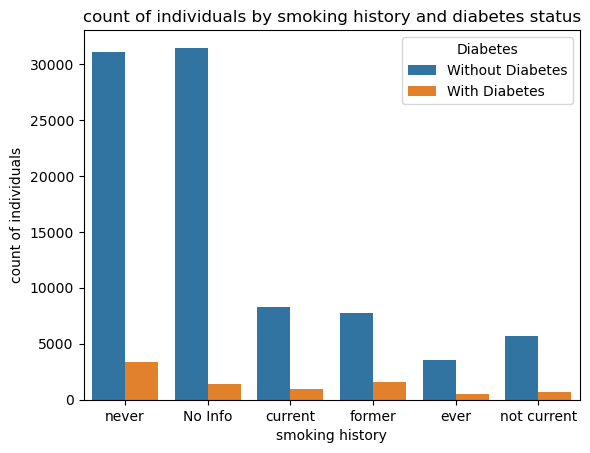

In [60]:

sns.countplot(x='smoking_history',hue='diabetes', data=smoking_history_df)
plt.xlabel('smoking history')
plt.ylabel('count of individuals')
plt.title('count of individuals by smoking history and diabetes status')
plt.legend(title ='Diabetes',labels=['Without Diabetes', 'With Diabetes'])
plt.show()

## Gender Distribution

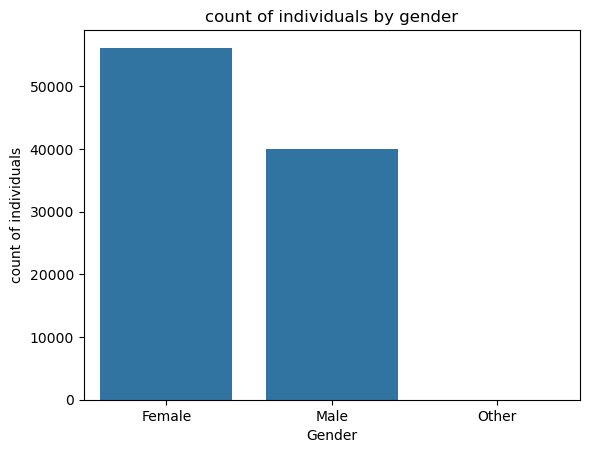

In [63]:
sns.countplot(x='gender',data=df)
plt.title('count of individuals by gender')
plt.xlabel('Gender')
plt.ylabel('count of individuals')
plt.show()

## Filter data based on Gender & Diabetes status

In [66]:
male1 = df[(df['gender']=='Male')&(df['diabetes']==1)]
male0 = df[(df['gender']=='Male')&(df['diabetes']==0)]
female1 = df[(df['gender']=='Female')&(df['diabetes']==1)]
female0 = df[(df['gender']=='Female')&(df['diabetes']==0)]
other1 = df[(df['gender']=='Other')&(df['diabetes']==1)]
other0 = df[(df['gender']=='Other')&(df['diabetes']==0)]

#### combine the filtered data into single DataFrame


In [69]:
gender_df=pd.concat([male1,male0,female1,female0,other1,other0])

#### create the histogram using seaborn

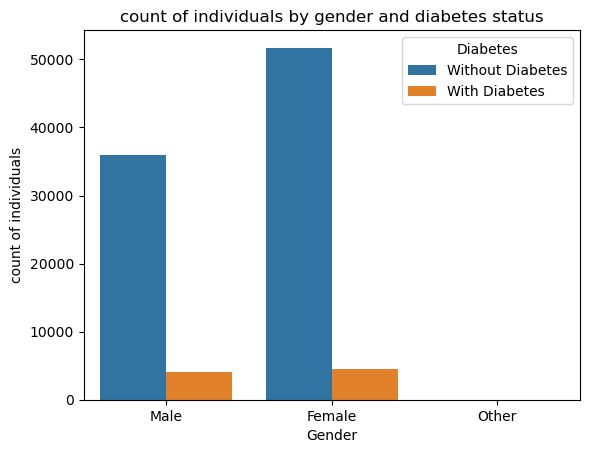

In [72]:
sns.countplot(x='gender',hue='diabetes', data=gender_df)
plt.xlabel('Gender')
plt.ylabel('count of individuals')
plt.title('count of individuals by gender and diabetes status')
plt.legend(title='Diabetes',labels=['Without Diabetes', 'With Diabetes'])
plt.show()

## Age Distribution

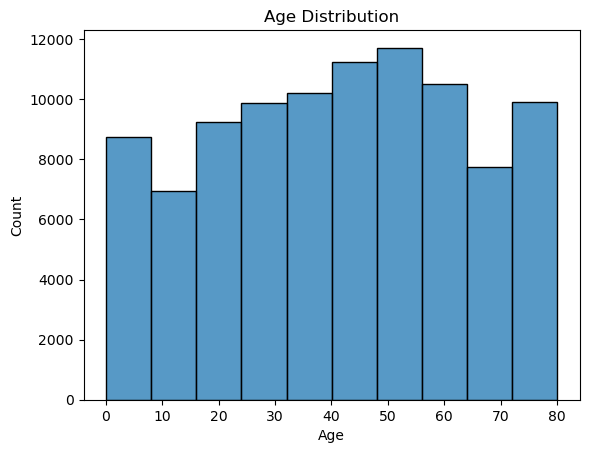

In [75]:
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### we have age range from 0  to 80.

### Filter data based on Diabetes & Age using Boxplot's

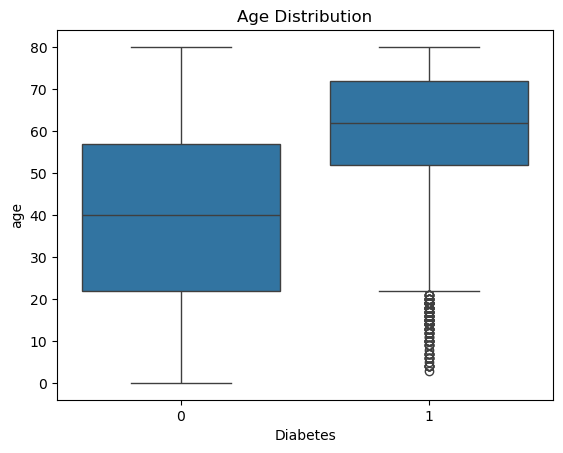

In [79]:
sns.boxplot(x=df['diabetes'], y=df['age'])
plt.title('Age Distribution')
plt.xlabel('Diabetes')
plt.show()

## Hypertension Distribution

### Filter data based on Hypertension and Diabetes status

In [83]:
hypertension1 = df[(df['hypertension']==1) & (df['diabetes']==1)]
hypertension0 = df[(df['hypertension']==0)& (df['diabetes']==0)]
nohypertension1 = df[(df['hypertension']==0) & (df['diabetes']==1)]
nohypertension0 = df[(df['hypertension']==1) & (df['diabetes']==0)]

### combine the filtered data into a single Dataframe

In [86]:
hypertension_df = pd.concat([hypertension1,hypertension0,nohypertension1,nohypertension0])

### create the histrogram using seaborn

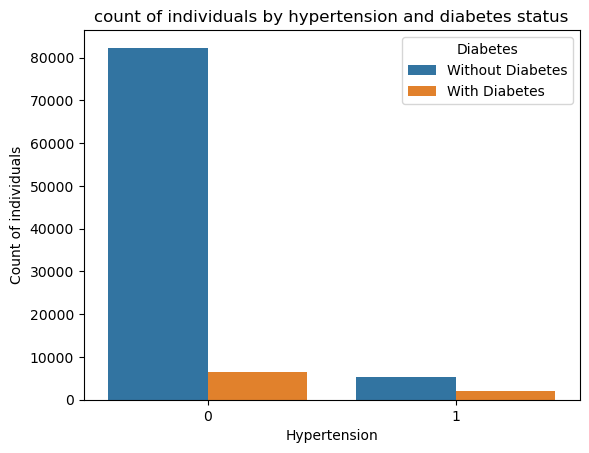

In [89]:
sns.countplot(x='hypertension',hue='diabetes',data=hypertension_df)
plt.xlabel('Hypertension')
plt.ylabel('Count of individuals')
plt.title('count of individuals by hypertension and diabetes status')
plt.legend(title = 'Diabetes', labels=['Without Diabetes','With Diabetes'])
plt.show()

#### people with hypertension are more susceptible to diabetes.

## Heart Disease Distribution

### Filter data based on Heart disease & Diabetes status

In [94]:
heart_disease1=df[(df['heart_disease']==1) & (df['diabetes']==1)]
heart_disease0=df[(df['heart_disease']==1) & (df['diabetes']==0)]
no_heart_disease1=df[(df['heart_disease']==0) & (df['diabetes']==0)]
no_heart_disease0=df[(df['heart_disease']==0) & (df['diabetes']==1)]

### combine the filtered data into a single Dataframe

In [97]:
heart_disease_df = pd.concat([heart_disease1,heart_disease0,no_heart_disease1,no_heart_disease0])

### create the histogram using seaboarn

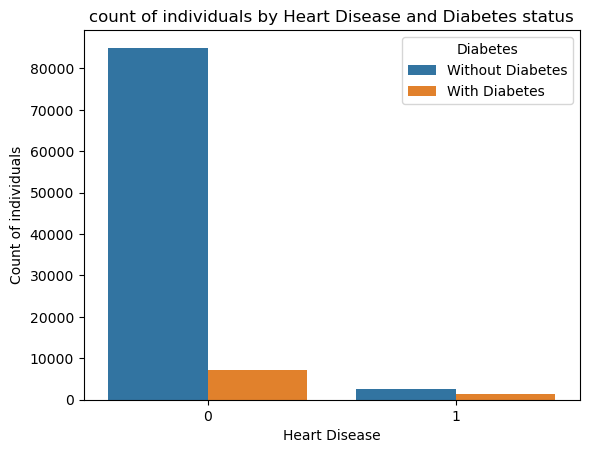

In [100]:
sns.countplot(x='heart_disease',hue='diabetes',data=heart_disease_df )
plt.xlabel('Heart Disease')
plt.ylabel('Count of individuals')
plt.title('count of individuals by Heart Disease and Diabetes status')
plt.legend(title = 'Diabetes', labels=['Without Diabetes','With Diabetes'])
plt.show()

#### people with heart disease are more susceptiable to diabetes.

## BMI Distribution

### Filter data based on BMI & Diabetes status

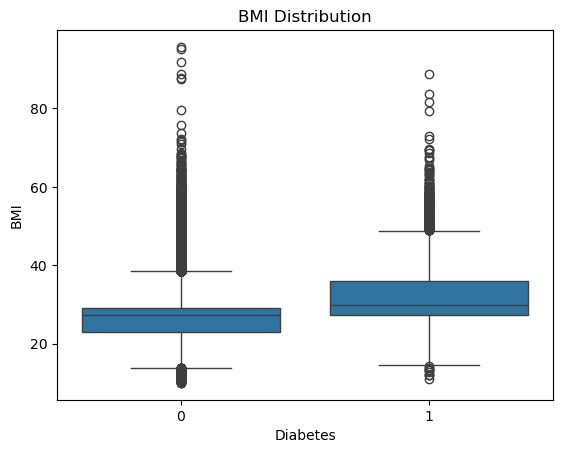

In [105]:
sns.boxplot(x=df['diabetes'],y=df['bmi'])
plt.title('BMI Distribution')
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.show()

## HbA1c Level Distribution

### Filter data based on HbA1c_level & Diabetes status

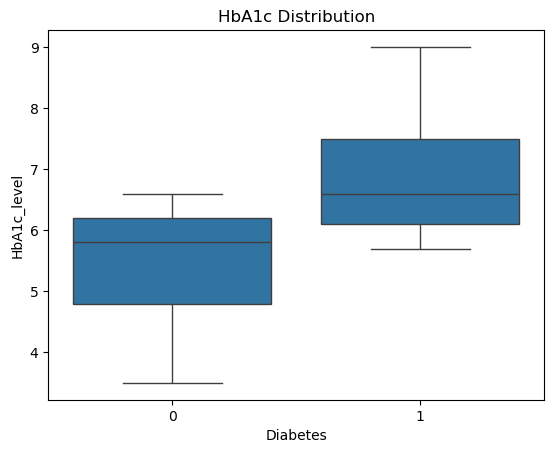

In [109]:
sns.boxplot(x=df['diabetes'],y=df['HbA1c_level'])
plt.title('HbA1c Distribution')
plt.xlabel('Diabetes')
plt.ylabel('HbA1c_level')
plt.show()

## Blood Glucose Level Distribution

### Filter data based on Blood_Glucose_Level & Diabetes status

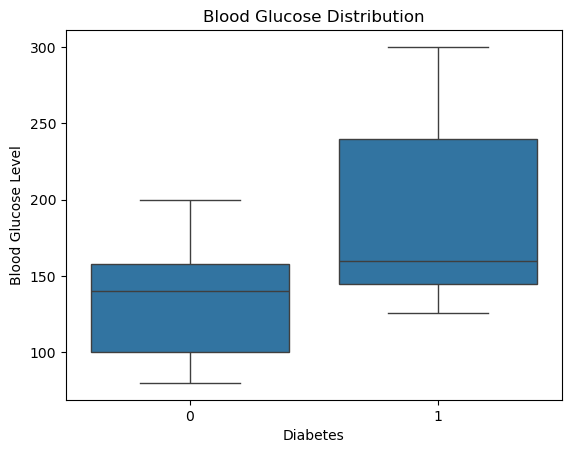

In [113]:
sns.boxplot(x=df['diabetes'],y=df['blood_glucose_level'])
plt.title('Blood Glucose Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.show()

## Correlation Heatmap

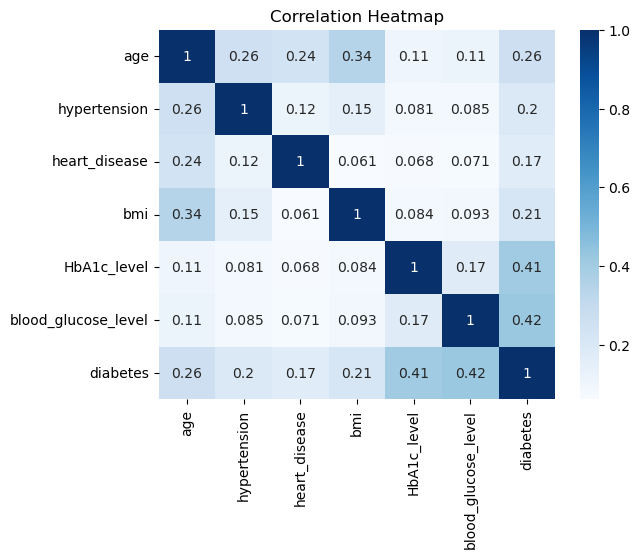

In [116]:
corr = df[['age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level','diabetes']].corr()
sns.heatmap(corr,annot=True,cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## Scatter plotting

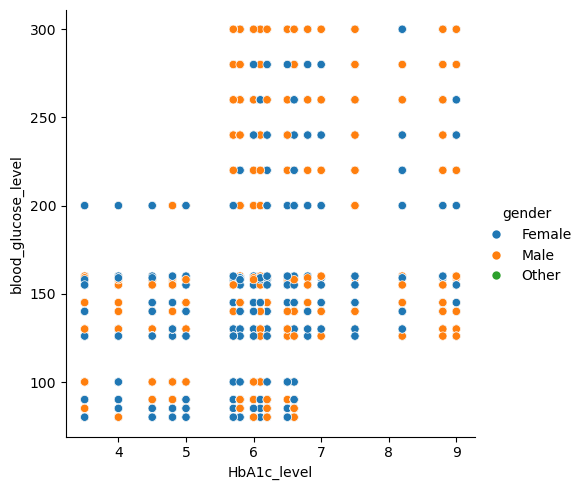

In [119]:
sns.relplot(x='HbA1c_level',y='blood_glucose_level',hue='gender',data=df)

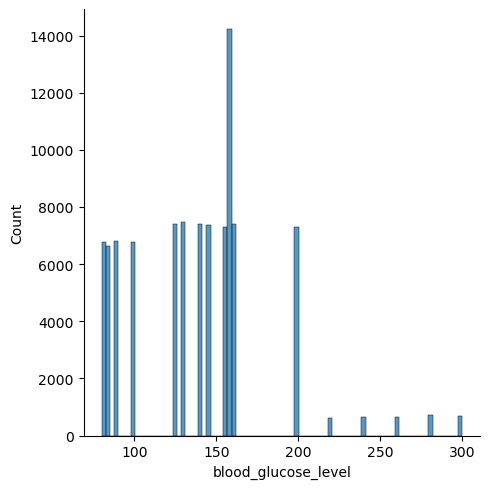

In [123]:
sns.displot(df['blood_glucose_level'])

<Axes: xlabel='age', ylabel='Count'>

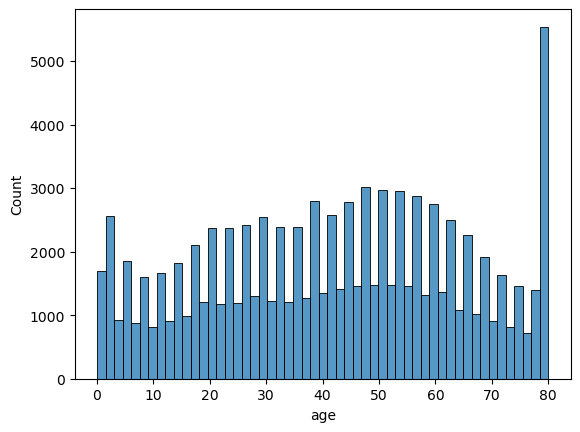

In [123]:
sns.histplot(df['age'])

## Diabetes Distribution

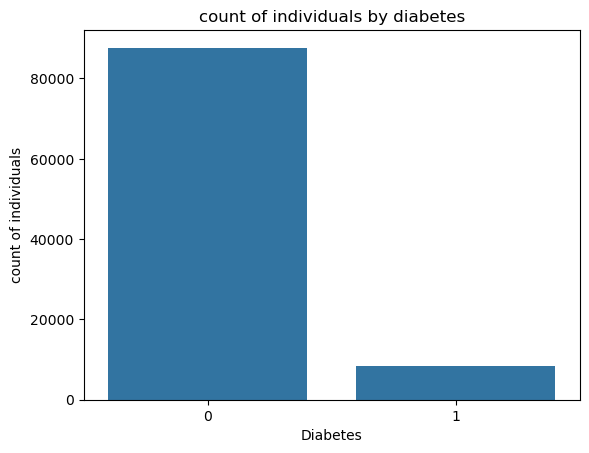

In [126]:
sns.countplot(x='diabetes',data=df)
plt.title('count of individuals by diabetes')
plt.xlabel('Diabetes')
plt.ylabel('count of individuals')
plt.show()